In [1]:
import ssms


In [2]:
from matplotlib import pyplot as plt
from ssms.basic_simulators import simulator
x = ssms.basic_simulators.simulator.simulator(model = 'ddm', theta = [0.5, 1.5, 0.5, 0.5], n_samples=1, no_noise = True)


passing through
v:  [0.5]
a:  [1.5]
z:  [0.5]
t:  [0.5]


In [3]:
x['metadata']['trajectory'][:100]

array([[0.        ],
       [0.0005    ],
       [0.001     ],
       [0.0015    ],
       [0.002     ],
       [0.0025    ],
       [0.003     ],
       [0.0035    ],
       [0.004     ],
       [0.0045    ],
       [0.005     ],
       [0.0055    ],
       [0.006     ],
       [0.0065    ],
       [0.007     ],
       [0.0075    ],
       [0.008     ],
       [0.0085    ],
       [0.009     ],
       [0.0095    ],
       [0.01      ],
       [0.0105    ],
       [0.011     ],
       [0.0115    ],
       [0.012     ],
       [0.0125    ],
       [0.013     ],
       [0.0135    ],
       [0.014     ],
       [0.0145    ],
       [0.015     ],
       [0.0155    ],
       [0.016     ],
       [0.0165    ],
       [0.017     ],
       [0.0175    ],
       [0.018     ],
       [0.0185    ],
       [0.019     ],
       [0.01949999],
       [0.01999999],
       [0.02049999],
       [0.02099999],
       [0.02149999],
       [0.02199999],
       [0.02249999],
       [0.02299999],
       [0.023

(array([244., 203., 103.,  72.,  30.,  19.,  11.,   4.,   1.,   3.]),
 array([0.54799998, 0.82429785, 1.10059571, 1.37689352, 1.65319145,
        1.92948937, 2.20578718, 2.48208499, 2.7583828 , 3.03468084,
        3.31097865]),
 <BarContainer object of 10 artists>)

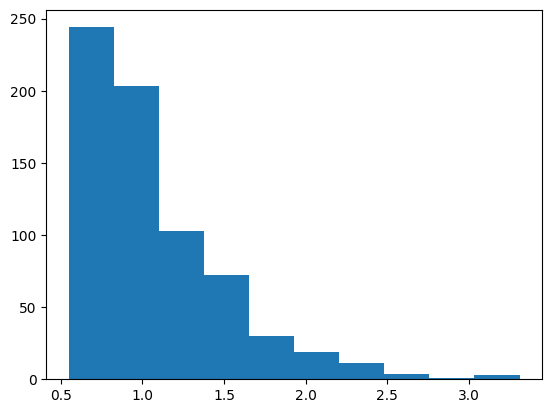

In [9]:
import numpy as np
plt.hist(np.squeeze(x['rts'][x['choices'] == 1]))

In [4]:
ssms.basic_simulators.simulator

AttributeError: module 'ssms.basic_simulators' has no attribute 'simulator'

In [54]:
test = {'a': np.zeros(100), 'b': np.zeros((1, 100)), 'c': np.zeros((1,100)), 'd': [1.],
        'e': 1.}

def _make_valid_dict(dict_in):
    collect_lengths = []
    for key, value in dict_in.items():
        if type(value) == list:
            dict_in[key] = np.array(value).astype(np.float32)
        if type(value) == int or type(value) == float:
            dict_in[key] = np.array([value]).astype(np.float32)

        dict_in[key] = np.squeeze(dict_in[key])
        
        if dict_in[key].ndim > 1:
            raise ValueError('Dimension of {} is greater than 1'.format(key))
        
        elif dict_in[key].ndim > 0:
            collect_lengths.append(dict_in[key].shape[0])
    
    if len(set(collect_lengths)) > 1:
        raise ValueError('thetas have to be either scalars or same length for ' \
                         'all thetas which are not scalars')
    
    # If there were any thetas provided as vectors (and they had the same length),
    # tile all scalar thetas to that length
    if len(set(collect_lengths)) > 0:
        for key, value in dict_in.items():
            if value.ndim == 0:
                dict_in[key] = np.tile(value, collect_lengths[0])
    else:
        for key, value in dict_in.items():
            if value.ndim == 0:
                dict_in[key] = np.expand_dims(value, axis = 0)
    return dict_in

def _theta_dict_to_array(theta = dict(), 
                         model_param_list = None):
    """Converts theta dictionary to numpy array for use with simulator function"""
    if model_param_list is None:
        raise ValueError('model_param_list is not supplied')
    
    return np.stack([theta[param] for param in model_param_list], axis = 1)

def _theta_array_to_dict(theta = None,
                         model_param_list = None):
    """Converts theta array to dictionary for use with simulator function"""
    if model_param_list is None:
        raise ValueError('model_param_list is not supplied')
    elif theta is None:
        raise ValueError('theta array is not supplied')
    elif theta.ndim == 1 and len(model_param_list) != theta.shape[0]:
            raise ValueError('model_param_list and theta array do not imply the same number of parameters')
    elif theta.ndim == 2 and len(model_param_list) != theta.shape[1]:
            raise ValueError('model_param_list and theta array do not imply the same number of parameters')
    else:
        if theta.ndim == 1:
            theta = np.expand_dims(theta, axis = 0)
        return {param: theta[:, i] for i, param in enumerate(model_param_list)}

test_dict = _make_valid_dict(test)

In [64]:
test = {'a': np.zeros(100), 'b': np.zeros((1, 100)), 'c': np.zeros((1,100)), 'd': [1.],
        'e': 1.}

test_all_scalars = {'a': [1.], 'b': 2., 'c': [3.], 'd': 4.,
        'e': 1.}

test_dict_all_scalar = _make_valid_dict(test_all_scalars)
test_array = _theta_dict_to_array(test_dict_all_scalar, ['a', 'b', 'c', 'd', 'e'])



In [65]:
test_dict_all_scalar

{'a': array([1.], dtype=float32),
 'b': array([2.], dtype=float32),
 'c': array([3.], dtype=float32),
 'd': array([4.], dtype=float32),
 'e': array([1.], dtype=float32)}

In [68]:
test_dict_all_scalar['a']

(1,)

In [62]:
test_array

array([[1., 2., 3., 4., 1.],
       [2., 2., 4., 4., 1.]], dtype=float32)

In [51]:
test_dict_all_scalar


{'a': array(1., dtype=float32),
 'b': array(2., dtype=float32),
 'c': array(3., dtype=float32),
 'd': array(4., dtype=float32),
 'e': array(1., dtype=float32)}

In [49]:
test_array

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0.

In [44]:
model_param_list = ['a', 'b', 'c', 'd', 'e']
test_array = np.zeros((1, 5))

test_dict_2 = _theta_array_to_dict(test_array, model_param_list)


In [45]:
test_dict_2

{'a': array([0.]),
 'b': array([0.]),
 'c': array([0.]),
 'd': array([0.]),
 'e': array([0.])}

In [29]:
test_np

{'a': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'b': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'c': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0

In [2]:
import numpy as np
np.array(np.zeros(100))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
### Check if simulator works with different types of inputs now
import ssms
from ssms.config.config import model_config
import numpy as np
from copy import deepcopy

# if key == "weibull_cdf" or key == "ddm_seq2_weibull_no_bias" \
#                     or key == "ddm_par2_weibull_no_bias" \
#                         or key == "ddm_mic2_adj_weibull_no_bias" \
#                             or key == "tradeoff_weibull_no_bias":
#                     print(sim_input_data[key][subkey])


model = 'weibull_cdf'
model_param_list = ssms.config.config.model_config[model]['params']
theta_dict_all_scalars = {param: np.mean([model_config[model]['param_bounds'][0][i],
                                          model_config[model]['param_bounds'][1][i]]) for i, param in enumerate(model_param_list)}
theta_dict_all_vectors = {param: np.tile(np.mean([model_config[model]['param_bounds'][0][i],
                                          model_config[model]['param_bounds'][1][i]]), 100) for i, param in enumerate(model_param_list)}

#theta_dict_all_vectors_random = {param: np.tile(n)}

theta_dict_sca_vec = deepcopy(theta_dict_all_vectors)

cnt = 0
for tmp_key in theta_dict_all_scalars.keys():
    theta_dict_sca_vec[tmp_key] = theta_dict_all_scalars[tmp_key]
    if cnt > 0: 
        break
    cnt += 1 

theta_dict_uneven = deepcopy(theta_dict_all_vectors)

cnt = 0
for tmp_key in theta_dict_all_scalars.keys():
    if cnt > 0:
        break
    theta_dict_uneven[tmp_key] = np.concatenate([theta_dict_all_vectors[tmp_key], np.zeros(2)])
    cnt += 1

in_dict = {'theta_dict_all_scalars': theta_dict_all_scalars,
           'theta_dict_all_vectors': theta_dict_all_vectors,
           'theta_dict_sca_vec': theta_dict_sca_vec,
           'theta_dict_uneven': theta_dict_uneven}


In [19]:
theta_dict_uneven

{'v': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'a': array([1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
        1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
        1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
        1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
        1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
        1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
        1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
        1.4, 1.4, 1.4

In [20]:
from ssms.basic_simulators.simulator import simulator
for key in in_dict.keys():
    print(key)
    out = simulator(theta = in_dict[key], model = model, n_samples = 10)

theta_dict_all_scalars
theta_dict_all_vectors
theta_dict_sca_vec
theta_dict_uneven


ValueError: thetas have to be either scalars or same length for all thetas which are not scalars

In [12]:
out['metadata'].keys()

dict_keys(['v', 'a', 'z', 't', 's', 'alpha', 'beta', 'delta_t', 'max_t', 'n_samples', 'simulator', 'boundary_fun_type', 'possible_choices', 'trajectory', 'boundary', 'model'])

In [14]:
out['metadata']['beta']

array([3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65,
       3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65,
       3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65,
       3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65,
       3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65,
       3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65,
       3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65,
       3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65,
       3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65, 3.65,
       3.65, 0.  , 0.  ], dtype=float32)

In [3]:
in_dict[key]

{'v': 0.0, 'a': 1.4, 'z': 0.5, 't': 1.0005, 'alpha': 2.65, 'beta': 3.65}

In [9]:
import ssms
from ssms.basic_simulators.simulator import simulator
import numpy as np
import pandas as pd

test = [1,2,3,4]
test = pd.DataFrame([test], columns = ['v', 'a', 'z', 't'])
#test = pd.DataFrame(np.zeros((100,4)), columns= ['v', 'a', 'z', 't'])
print(isinstance(test, pd.DataFrame))
model = 'ddm'
out = simulator(test.to_dict('list'), 
          model = model,
          n_samples = 10)

# out = simulator(theta_dict_all_vectors, 
#           model = model,
#           n_samples = 10)



True


In [19]:
test = [1,2,3,4]
np.tile(np.array(test), (100, 1)).shape

(100, 4)

In [4]:
out['metadata']

{'v': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 'a': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 'z': array([0., 0., 0., 0., 0., 0., 0., 0., 0

In [11]:
out['metadata']['v']

{'v': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 'a': array([1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65,
        1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65,
        1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65,
        1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65,
        1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65,
        1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65,
        1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65,


In [10]:
np.concatenate([np.zeros(100), np.zeros(100)])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
model_param_list

{'name': 'angle',
 'params': ['v', 'a', 'z', 't', 'theta'],
 'param_bounds': [[-3.0, 0.3, 0.1, 0.001, -0.1], [3.0, 3.0, 0.9, 2.0, 1.3]],
 'boundary': <function ssms.basic_simulators.boundary_functions.angle(t=1, theta=1)>,
 'n_params': 5,
 'default_params': [0.0, 1.0, 0.5, 0.001, 0.0],
 'hddm_include': ['z', 'theta'],
 'nchoices': 2}

In [4]:
ssms.config.config.model_config

{'ddm': {'name': 'ddm',
  'params': ['v', 'a', 'z', 't'],
  'param_bounds': [[-3.0, 0.3, 0.1, 0.0], [3.0, 2.5, 0.9, 2.0]],
  'boundary': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
  'n_params': 4,
  'default_params': [0.0, 1.0, 0.5, 0.001],
  'hddm_include': ['z'],
  'nchoices': 2},
 'ddm_legacy': {'name': 'ddm_legacy',
  'params': ['v', 'a', 'z', 't'],
  'param_bounds': [[-3.0, 0.3, 0.1, 0.0], [3.0, 2.5, 0.9, 2.0]],
  'boundary': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
  'n_params': 4,
  'default_params': [0.0, 1.0, 0.5, 0.001],
  'hddm_include': ['z'],
  'nchoices': 2},
 'ddm_deadline': {'name': 'ddm_deadline',
  'params': ['v', 'a', 'z', 't', 'deadline'],
  'param_bounds': [[-3.0, 0.3, 0.1, 0.0, 0.1], [3.0, 2.5, 0.9, 2.0, 5.0]],
  'boundary': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
  'n_params': 5,
  'default_params': [0.0, 1.0, 0.5, 0.001, 5.0],
  'hddm_include': ['z', 'deadline'],
  'nchoices': 2},
 'ang

In [5]:
import ssms

ImportError: cannot import name 'model_config' from 'ssms.config' (/Users/afengler/Library/CloudStorage/OneDrive-Personal/proj_ssm_simulators/ssm-simulators/ssms/config/__init__.py)

In [4]:
import pandas as pd
import numpy as np
test = pd.DataFrame(np.zeros((100,4)), columns= ['a', 'b', 'c', 'd'])

In [6]:
help(test.to_dict)

Help on method to_dict in module pandas.core.frame:

to_dict(orient: "Literal['dict', 'list', 'series', 'split', 'tight', 'records', 'index']" = 'dict', into: 'type[dict]' = <class 'dict'>, index: 'bool' = True) -> 'dict | list[dict]' method of pandas.core.frame.DataFrame instance
    Convert the DataFrame to a dictionary.
    
    The type of the key-value pairs can be customized with the parameters
    (see below).
    
    Parameters
    ----------
    orient : str {'dict', 'list', 'series', 'split', 'tight', 'records', 'index'}
        Determines the type of the values of the dictionary.
    
        - 'dict' (default) : dict like {column -> {index -> value}}
        - 'list' : dict like {column -> [values]}
        - 'series' : dict like {column -> Series(values)}
        - 'split' : dict like
          {'index' -> [index], 'columns' -> [columns], 'data' -> [values]}
        - 'tight' : dict like
          {'index' -> [index], 'columns' -> [columns], 'data' -> [values],
          